# Quantum Full Adder:

In [1]:
import numpy as np
import qiskit
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, quantum_info, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

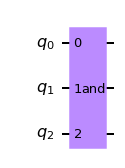

In [2]:
and_gate = QuantumCircuit(3) # quantum and gate
and_matrix = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0],
                     [0,0,0,1,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0],
                     [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
op1 = quantum_info.Operator(and_matrix)
and_gate.unitary(op1, [0,1,2], label='and')
display(and_gate.draw(output="mpl"))

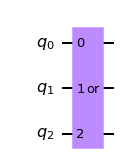

In [3]:
or_gate = QuantumCircuit(3) # quantum or gate
or_matrix = np.array([[1,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,],
                     [0,0,1,0,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,1,0,0,0],
                     [0,0,0,0,0,0,0,1],[0,0,0,0,0,0,1,0]])
op2 = quantum_info.Operator(or_matrix)
or_gate.unitary(op2, [0,1,2], label='or')
display(or_gate.draw(output="mpl"))

In [7]:
def quantum_full_adder(x,y): # Function to make analogous quantum full adder
    x = int(x)
    y = int(y)
    full_adder_circuit = QuantumCircuit(6,2)
    full_adder_circuit.cx(0,1)
    full_adder_circuit.unitary(op1, [0,1,3], label='and')
    full_adder_circuit.unitary(op1, [2,3,4], label='and')
    full_adder_circuit.cx(1,2)
    full_adder_circuit.unitary(op2, [3,4,5], label='or')
    if x==y==0:
        full_adder_circuit.measure([5,2],[0,1])
    elif (x==0 and y==1) or (x==1 and y==0):    
        full_adder_circuit.x(5)
        full_adder_circuit.measure([5,2],[0,1])
    elif x==y==1:
        full_adder_circuit.x(2)
        full_adder_circuit.measure([5,2],[0,1])
    else:
        print('Oops! Wrong output! This adder can only work with 0 and 1.')    
    display(full_adder_circuit.draw(output="mpl"))
    backend= Aer.get_backend('qasm_simulator')
    job= execute(full_adder_circuit, backend, shots= 5000)
    results= job.result()
    counts= results.get_counts()
    graph= plot_histogram(counts)
    display(graph) 

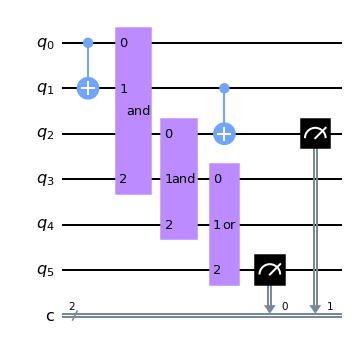

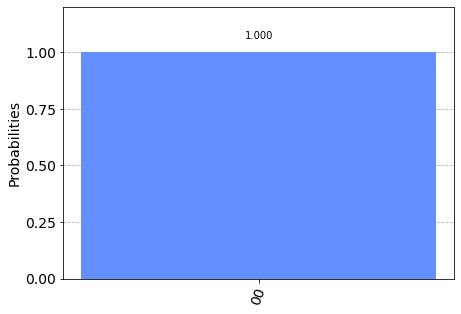

In [8]:
quantum_full_adder(0,0) # Checking the function by adding 0 and 0

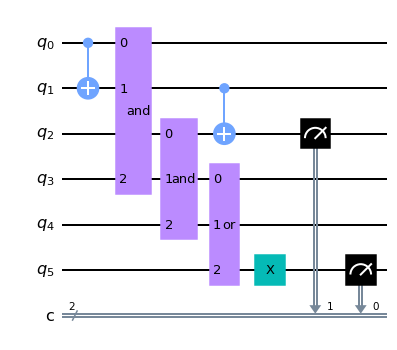

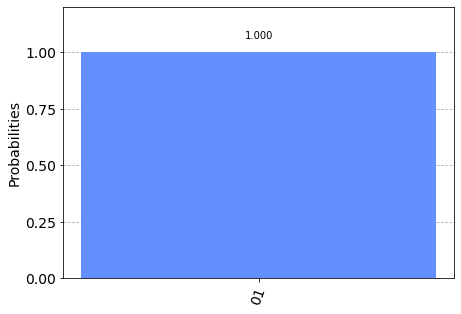

In [9]:
quantum_full_adder(1,0) # Checking the function by adding 1 and 0

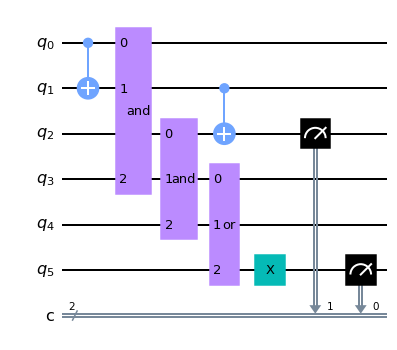

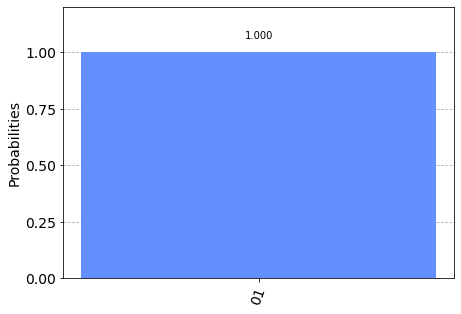

In [10]:
quantum_full_adder(0,1) # Checking the function by adding 0 and 1

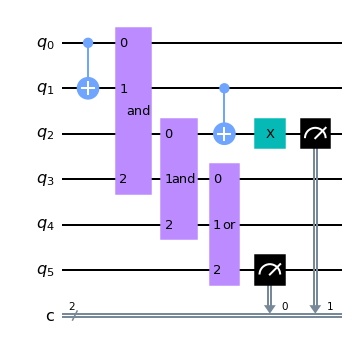

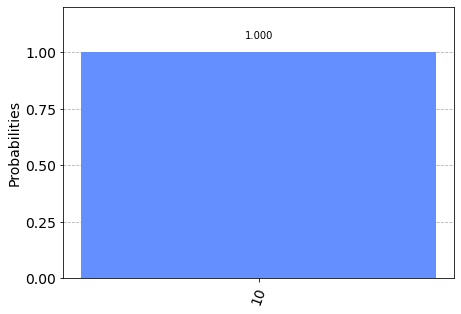

In [11]:
quantum_full_adder(1,1) # Checking the function by adding 1 and 1

# Alternative approach:

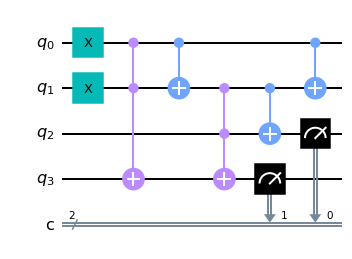

In [12]:
full_adder = QuantumCircuit(4,2)
full_adder.x([0,1])
# full_adder.x([1])
# full_adder.x([0])
full_adder.ccx(0,1,3)
full_adder.cx(0,1)
full_adder.ccx(1,2,3)
full_adder.cx(1,2)
full_adder.cx(0,1)
full_adder.measure([2,3],[0,1])
display(full_adder.draw(output="mpl"))

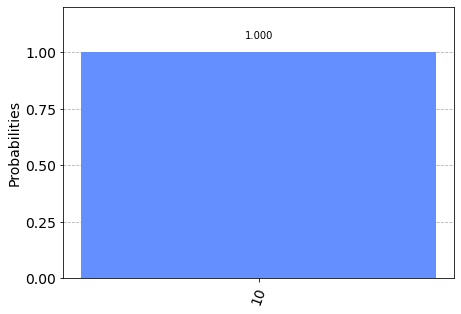

In [13]:
backend= Aer.get_backend('qasm_simulator')
job= execute(full_adder, backend, shots= 5000)
results= job.result()
counts= results.get_counts()
graph= plot_histogram(counts)
display(graph) 